## Importing neccessary modules

In [1]:
from sklearnex import patch_sklearn 
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [3]:
raw=pd.read_csv(r"K:\Desktop\NIIT\Mini project\DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
raw

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


## Data summarization

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [5]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.793380,4.651716,4.555000,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.070301,0.048621,0.003575,0.033143,0.062347,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290000,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
raw.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [7]:
print("Number of duplicate rows ",raw.duplicated().sum())

Number of duplicate rows  0


### Since there are no duplicated columns , No pattern or structure could be identified for the missing values , Since imputing 5600+ rows with any statistical metric could bias the data hugely , The ultimate step we can take here is to drop the NaN records

In [8]:
raw.dropna(axis=0,how="any",inplace=True)

### Splitting independent and target variable 

In [9]:
X=raw.drop("Item_Outlet_Sales",axis=1)
X=X.drop('Outlet_Identifier',axis=1)
y=raw.Item_Outlet_Sales

## Data preprocessing

In [10]:
X.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

## Changing categorical into numerical values

In [11]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder

In [12]:
objects=X.select_dtypes(include="object").columns
encoder=LabelEncoder()
encoded_scaled=X.copy()
for item in objects:
    encoded_scaled[item]=encoder.fit_transform(encoded_scaled[item])

scaler=MinMaxScaler()
for item in X.columns:
        encoded_scaled[item]=scaler.fit_transform(encoded_scaled[item].to_numpy().reshape(-1,1))
encoded_scaled

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,0.583333,0.5,0.0,0.333333
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,1.000000,0.5,1.0,0.666667
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,0.583333,0.5,0.0,0.333333
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.541667,0.5,1.0,0.000000
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.083333,0.0,1.0,0.333333
...,...,...,...,...,...,...,...,...,...,...
8518,0.237484,0.137541,0.0,0.163812,0.866667,0.777729,0.083333,0.0,1.0,0.333333
8519,0.575738,0.227746,1.0,0.133638,0.000000,0.326263,0.708333,1.0,0.5,0.333333
8520,0.870988,0.359929,0.0,0.097321,0.533333,0.228492,0.791667,1.0,0.5,0.333333
8521,0.437099,0.158083,1.0,0.436080,0.866667,0.304939,1.000000,0.5,1.0,0.666667


# Feature selection and extraction

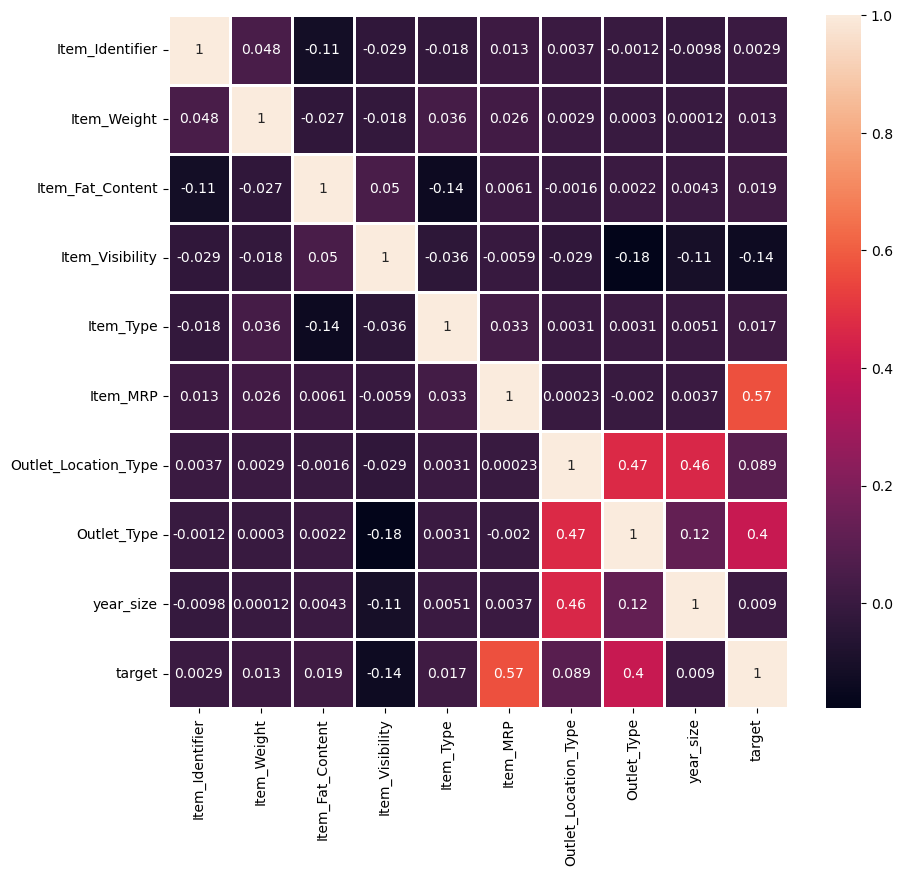

In [21]:
encoded_scaled["target"]=y
sns.heatmap(encoded_scaled.corr(),annot=True,linewidth=0.8)
plt.rcParams["figure.figsize"] = (10,9)

#x=encoded_scaled.iloc[:,[3,5,6,9,10]]
plt.show()

In [14]:
encoded_scaled["year_size"]=encoded_scaled['Outlet_Establishment_Year']-encoded_scaled['Outlet_Size']
encoded_scaled.drop("Outlet_Size",axis=1,inplace=True)
encoded_scaled.drop("Outlet_Establishment_Year",axis=1,inplace=True)

### Since we can find only a few columns with direct correlation with target variable the ideal Machine learning model would be Decision Tree Regressor we would use bagging stacking and choose the best model from it

To make things interesting lets perform every possible regression algorithm with every possible hyperparamter and find out the best one from it 

from sklearn.tree import DecisionTreeRegressor as tree

model_1=tree()

model_1.fit()



In [15]:
def perform_pca(df, n_components):
    pca = PCA(n_components=n_components)
    pca_df = pca.fit_transform(df)
    column_names = [f"PC{i+1}" for i in range(n_components)]
    pca_df = pd.DataFrame(data=pca_df, columns=column_names)
    return pca_df

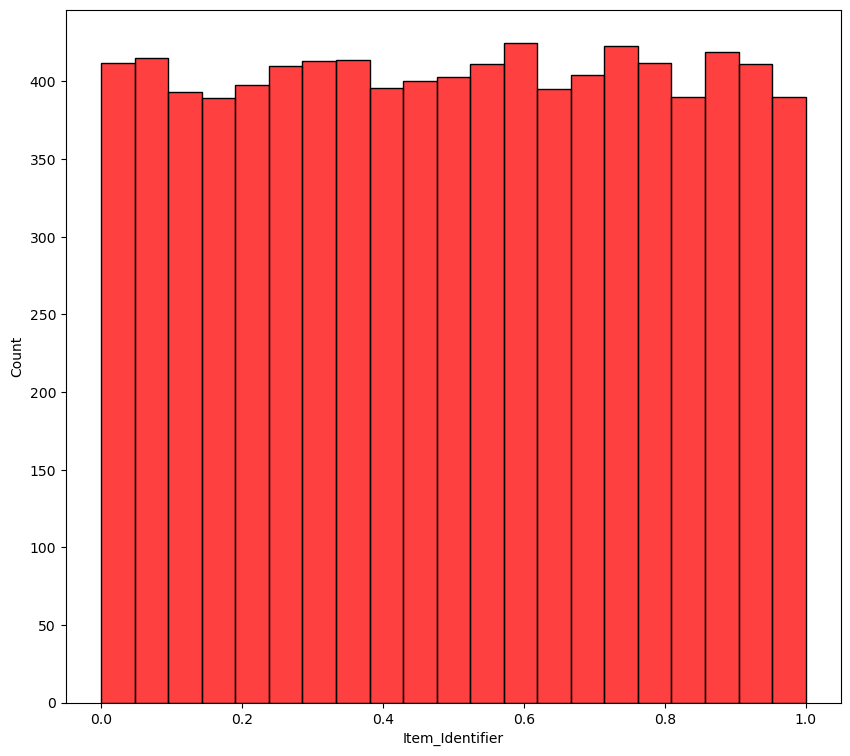

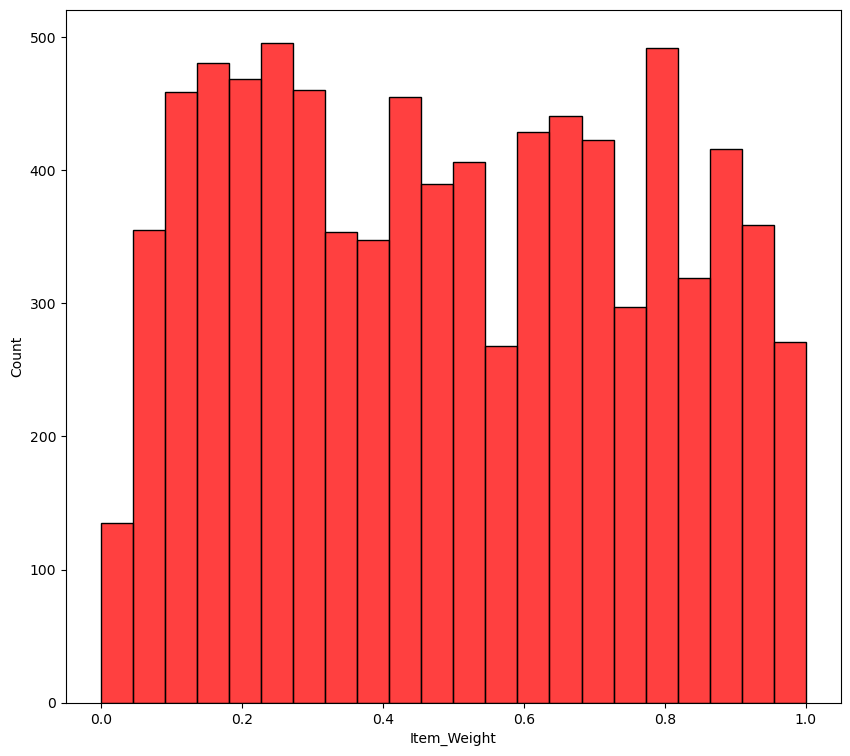

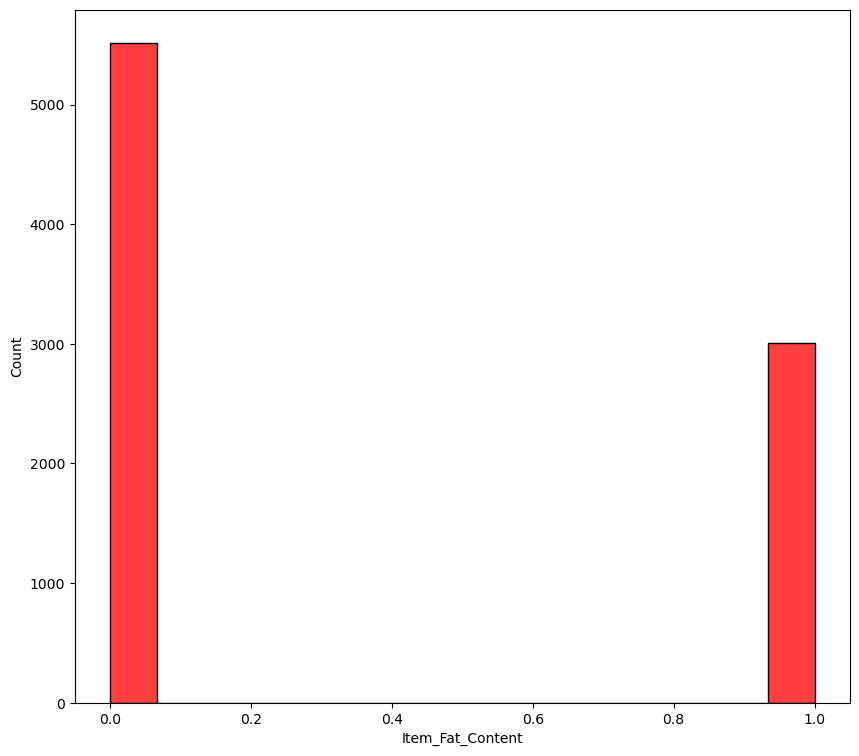

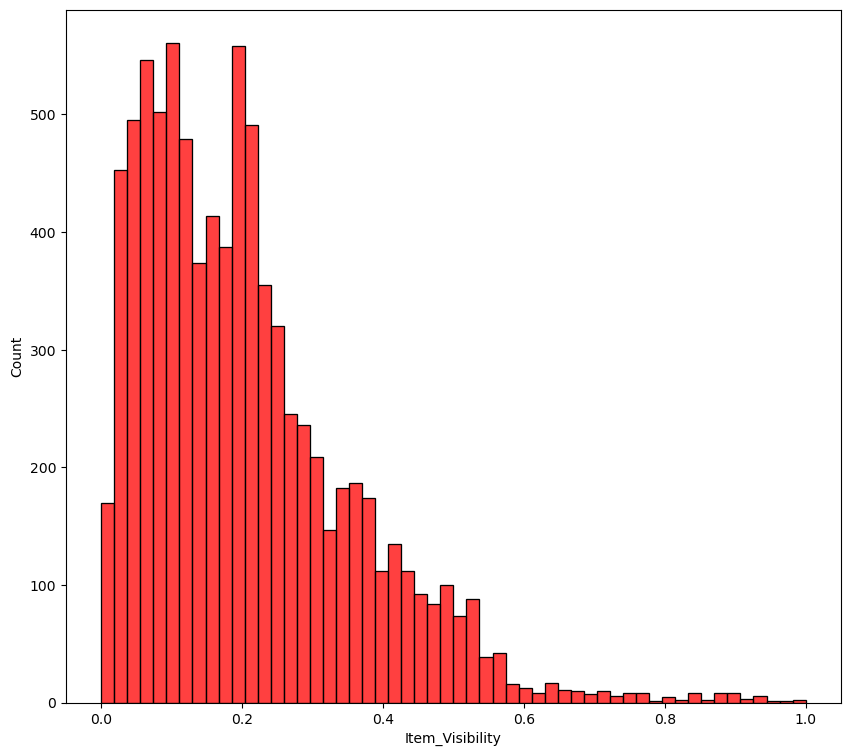

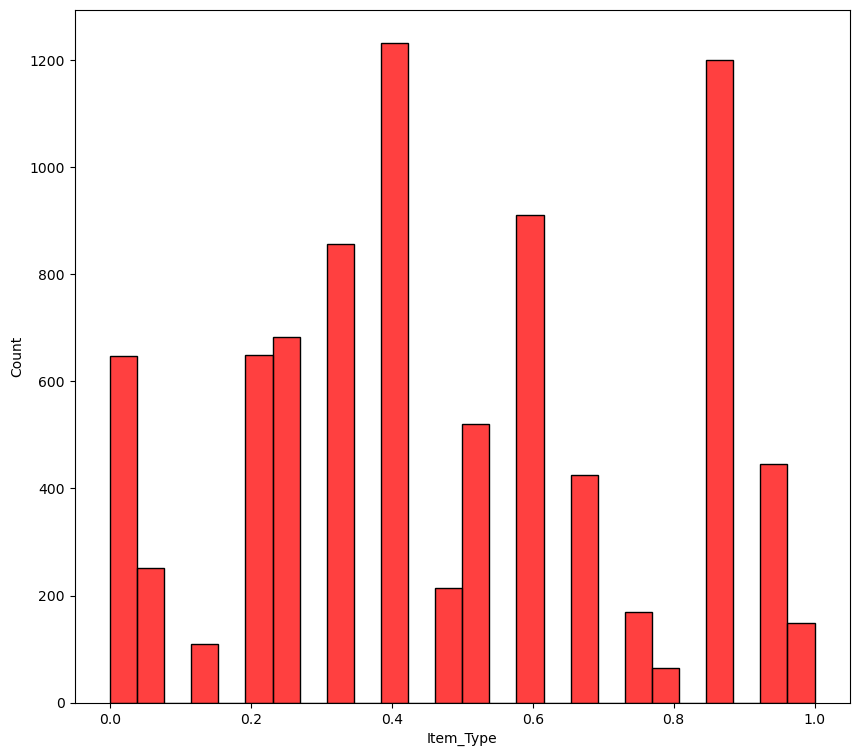

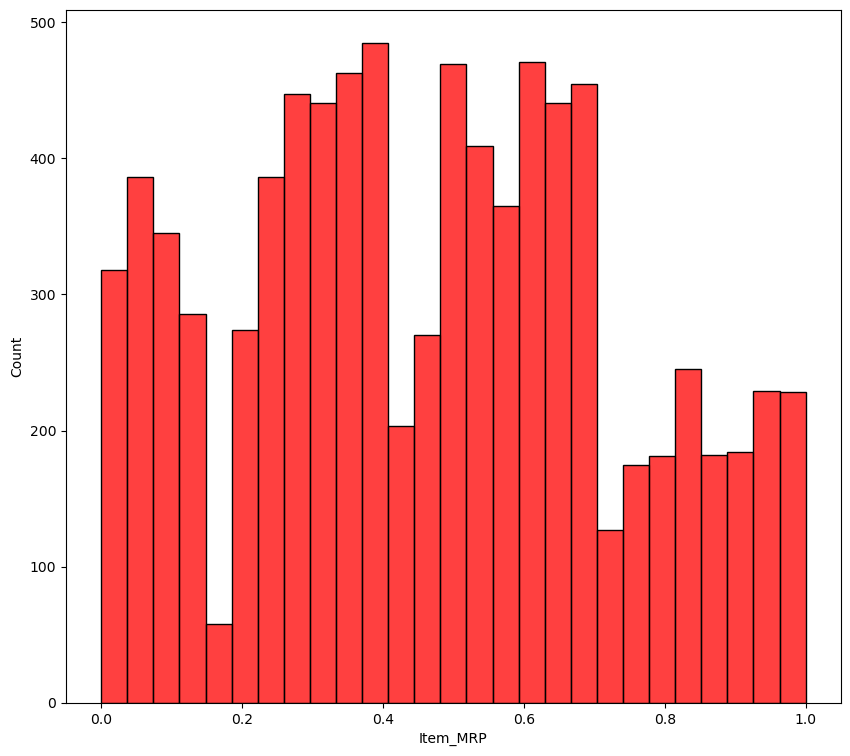

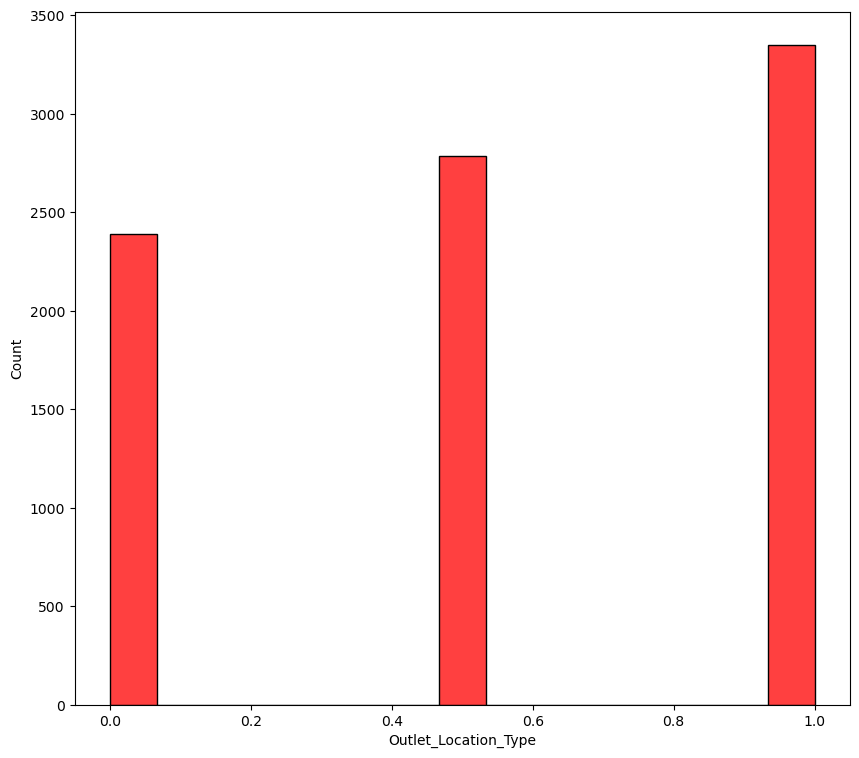

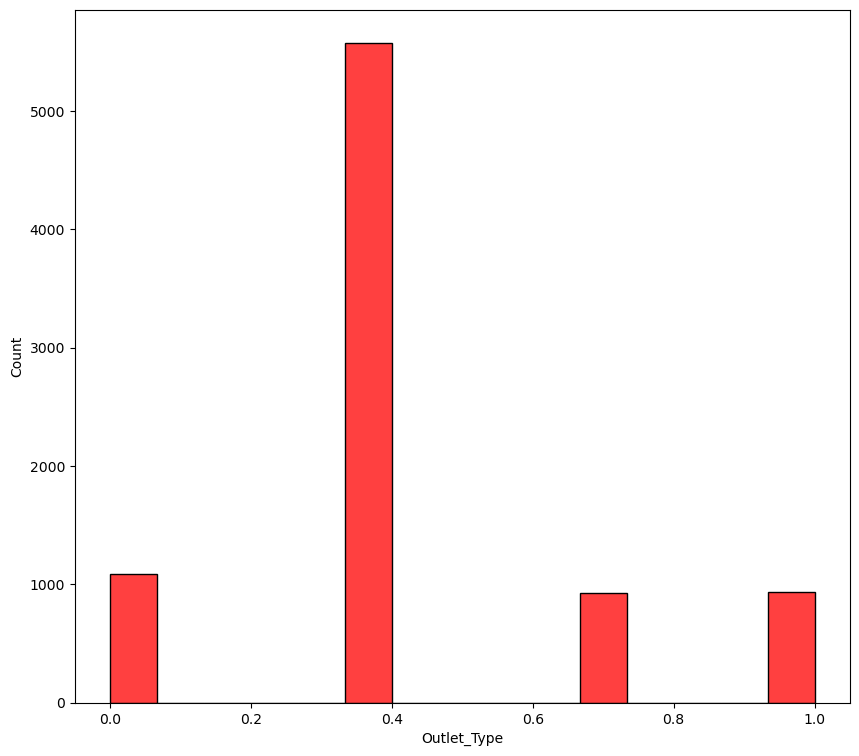

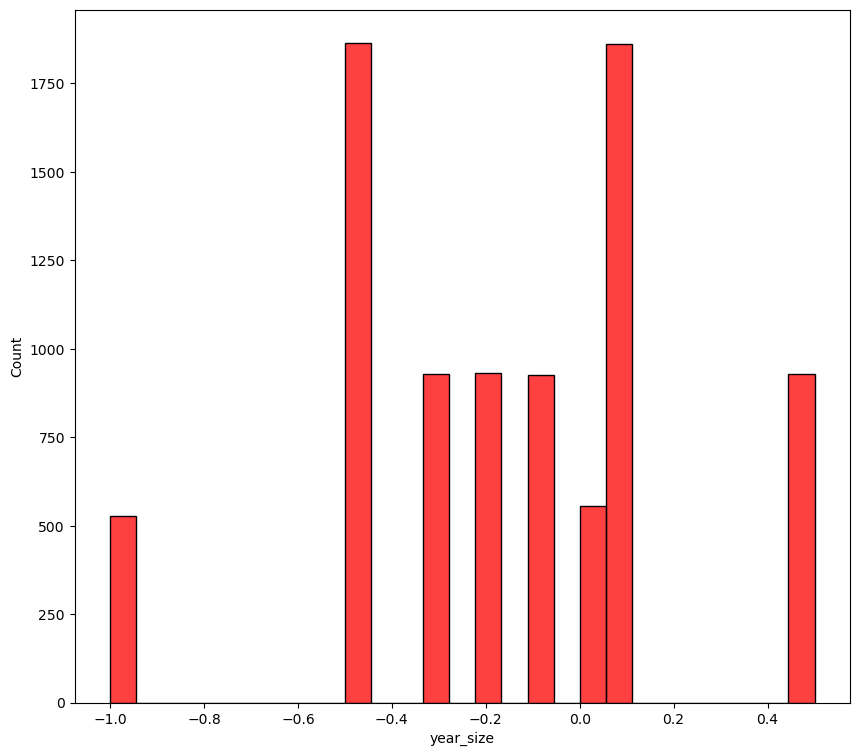

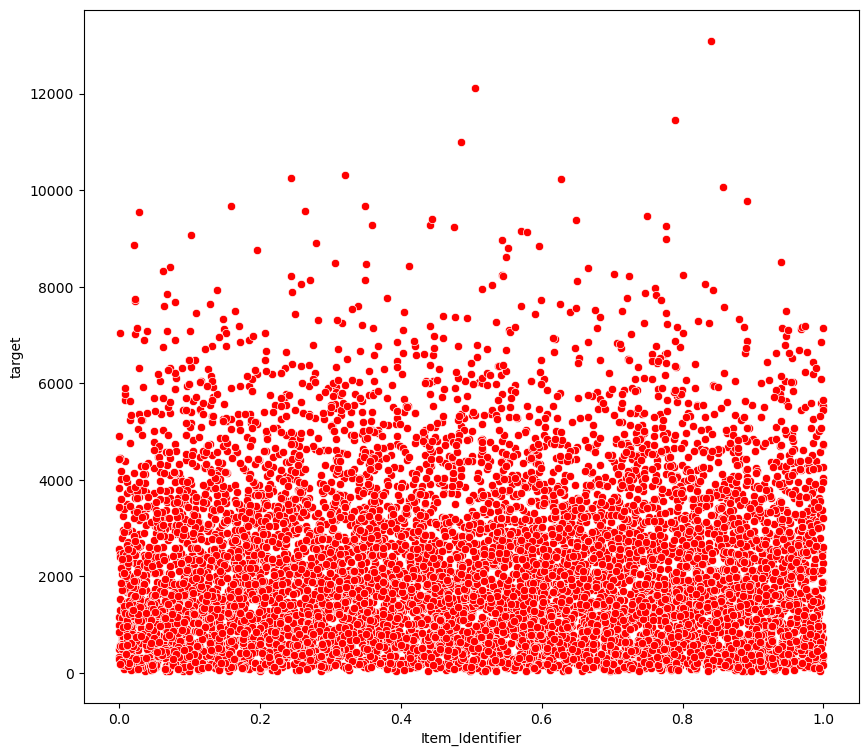

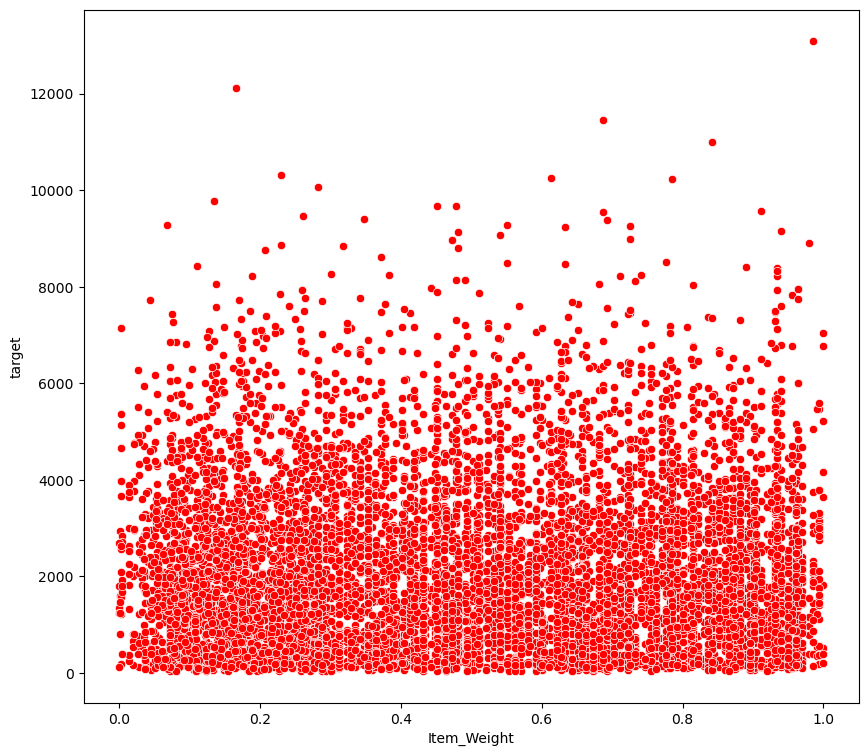

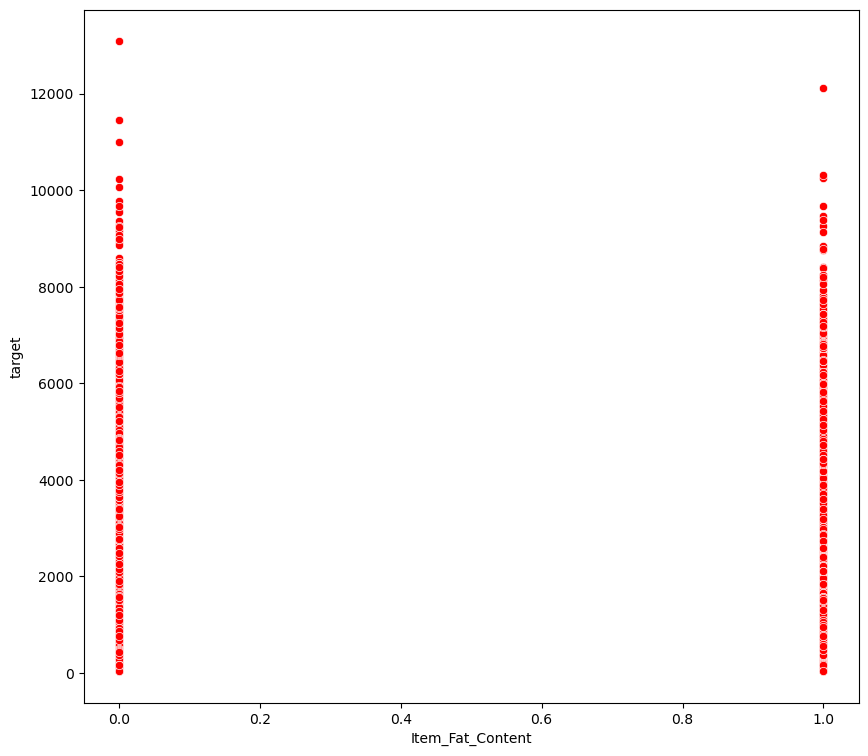

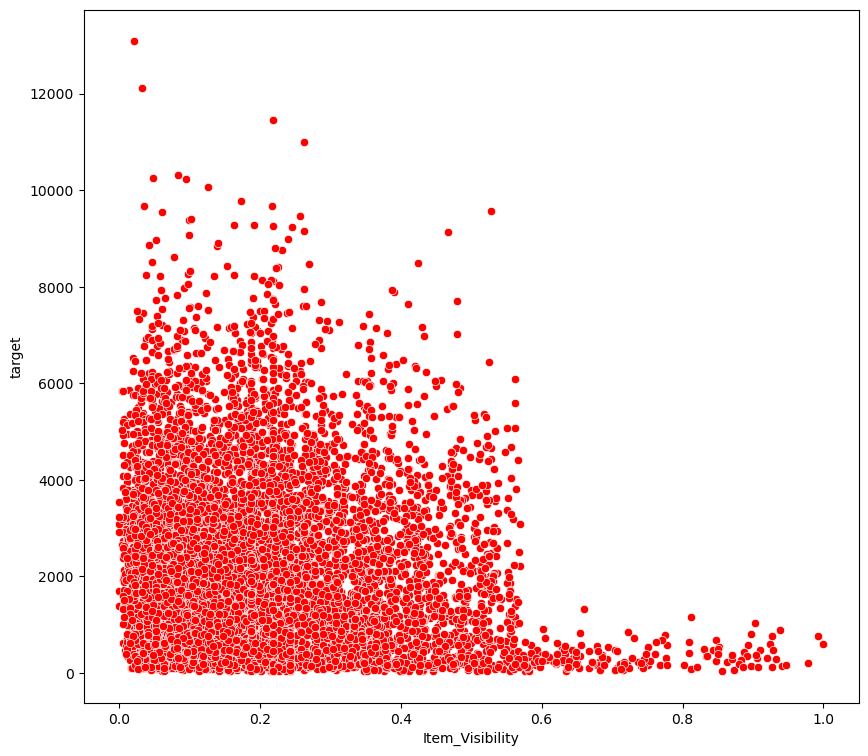

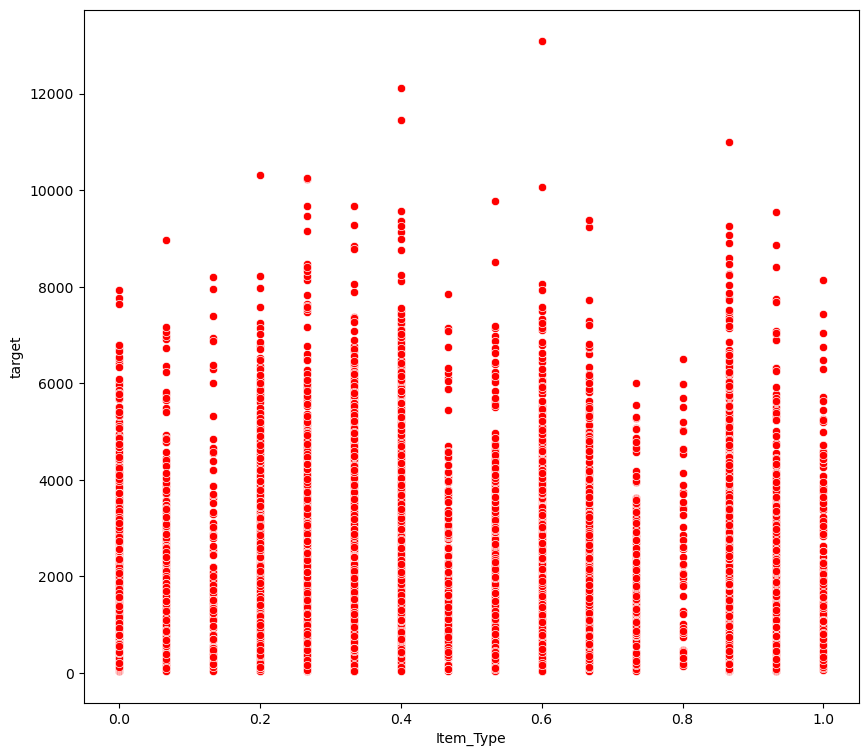

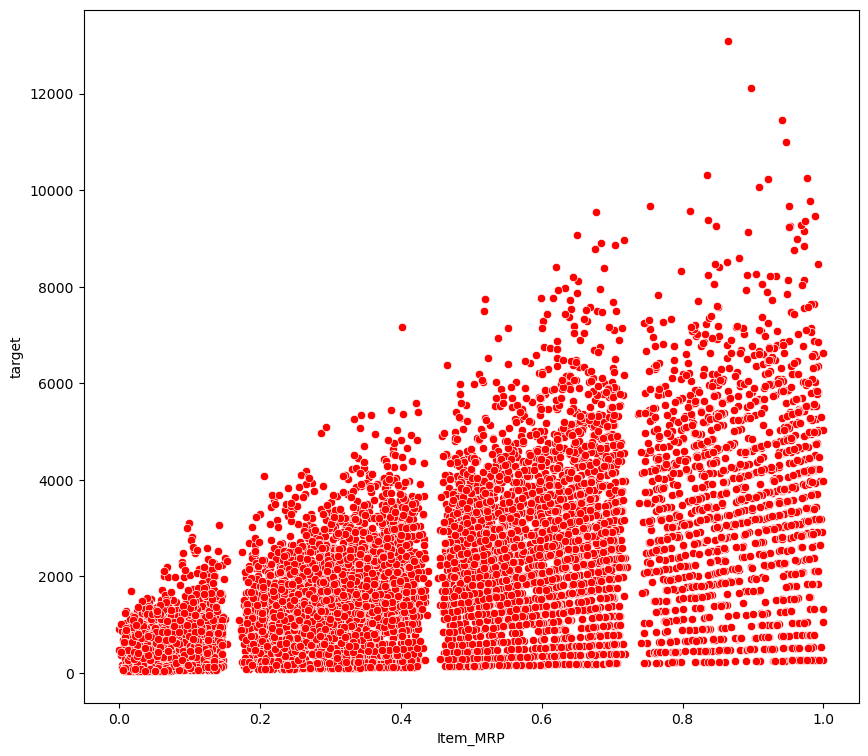

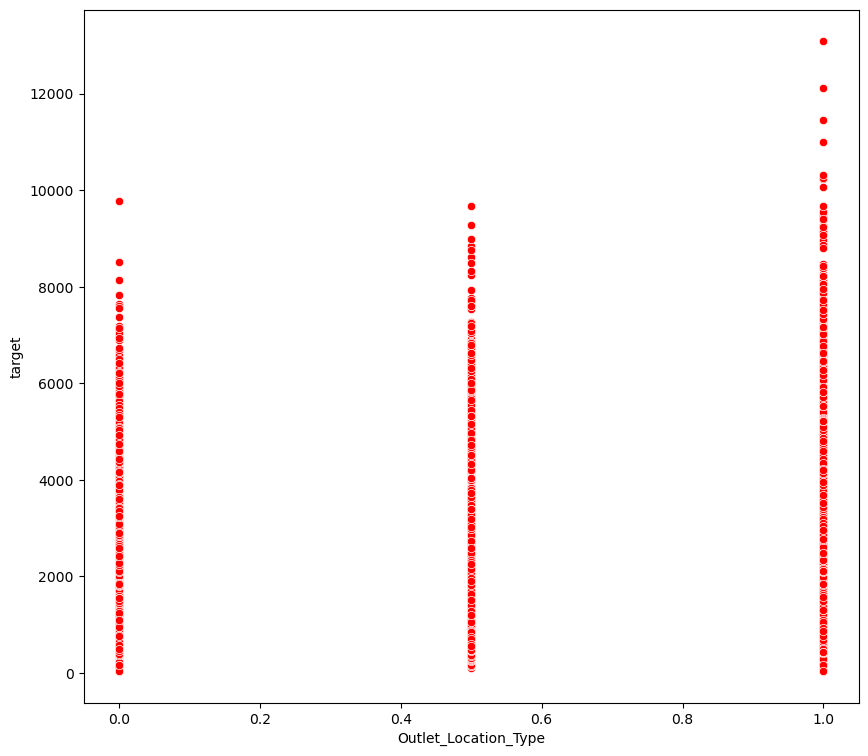

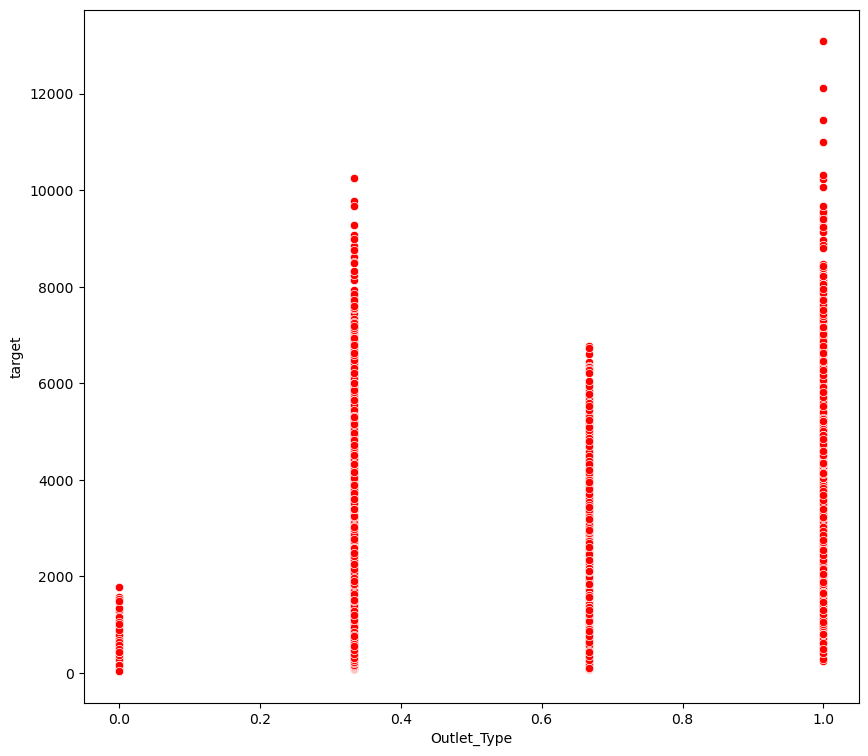

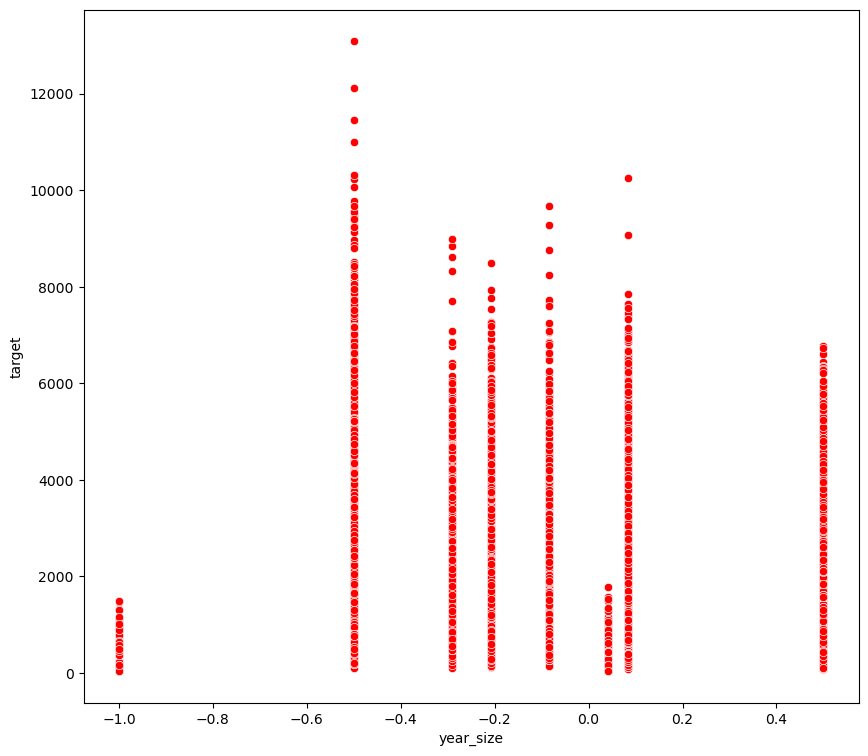

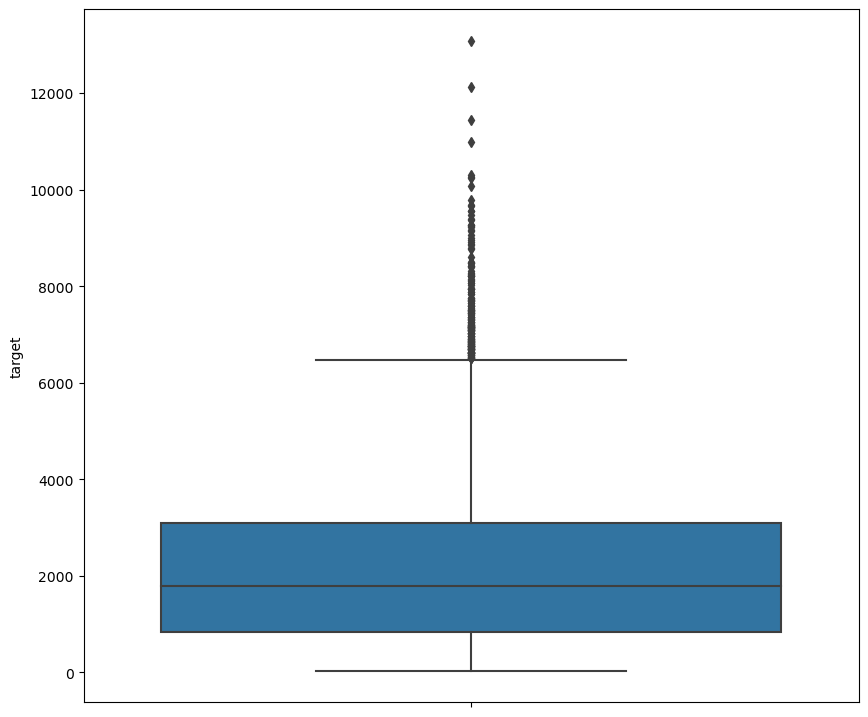

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_relationships(df, target_col, hist_color='red', scatter_color='red'):
    for col in df.columns:
        if col != target_col:
            sns.histplot(data=df, x=col, color=hist_color)
            plt.show()
    for col in df.columns:
        if col != target_col:
            sns.scatterplot(data=df, x=col, y=target_col, color=scatter_color)
            plt.show()
    
    sns.boxplot(data=df, y=target_col)
    plt.show()


plot_relationships(encoded_scaled,"target")

## Interpretation

Item_Weight: The mean weight of the items is 12.79 units with a standard deviation of 4.65. The range of weights appears to be relatively narrow, with the minimum weight being 4.55 units and the maximum weight being 21.35 units.


Item_Visibility: The mean visibility of the items is 0.07 with a standard deviation of 0.05. The range of visibility values is also relatively narrow, with the minimum visibility being 0.0036 and the maximum visibility being 0.328.


Item_MRP: The mean maximum retail price of the items is 141.00 with a standard deviation of 62.09. The range of prices is quite large, with the minimum price being 31.29 and the maximum price being 266.89.


Outlet_Establishment_Year: The mean year of establishment for the outlets is 1997.83 with a standard deviation of 8.37. The range of establishment years is relatively narrow, with the oldest outlet being established in 1985 and the most recent outlet being established in 2009.


Item_Outlet_Sales: The mean sales of the items is 2181.29 with a standard deviation of 1706.50. The range of sales is quite large, with the minimum sales value being 33.29 and the maximum sales value being 13086.96. The distribution of sales values is likely to be positively skewed, with a long tail towards the higher values, as the mean is much larger than the median (1794.33).

In [17]:
def compare_models(x,y,dt_params,rf_params,n=8):
    linear=LinearRegression()
    tree=DecisionTreeRegressor()
    forest=RandomForestRegressor()
    
    x=perform_pca(x,n)
    
    base_estimator = DecisionTreeRegressor(max_depth=5)


    ada_boost = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=10, learning_rate=0.1)

    
    base_models = [('dt1', DecisionTreeRegressor(max_depth=7, min_samples_split=6)),('dt2', RandomForestRegressor(max_depth=7,min_samples_split=10, n_estimators=200)),('lr', LinearRegression())]
    
    stack_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())
    
    r2_scores=[]
    
    rmse=[]
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.24, random_state=32)
    
    kf =KFold(n_splits=10,shuffle=True, random_state=1)
    
    dt_grid = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=dt_params,scoring='neg_mean_squared_error',cv=kf,n_jobs=-1)
    
    rf_grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid=rf_params,scoring='neg_mean_squared_error',cv=kf,n_jobs=-1)
    
    dt_grid.fit(xtrain, ytrain)
    rf_grid.fit(xtrain, ytrain)
    
    dt_best_params = dt_grid.best_params_
    rf_best_params = rf_grid.best_params_
    
    models=(linear,tree,forest,stack_model,ada_boost)
    
    for model in models:
        
        if isinstance(model, DecisionTreeRegressor):
            model.set_params(**dt_best_params)
            
        elif isinstance(model, RandomForestRegressor):
            model.set_params(**rf_best_params)
            
        model.fit(xtrain,ytrain)
        cv_results = cross_val_score(model, xtrain, ytrain, cv=kf, scoring='neg_mean_squared_error')
        rmse.append(np.sqrt(np.mean(-1*cv_results)))
        r2_scores.append((model.score(xtrain,ytrain),model.score(xtest,ytest)))
        
    return models,rmse,r2_scores

In [18]:
dt_params = {'max_depth': [2, 3, 7, 9, 11], 'min_samples_split': [2, 4, 6, 8, 10]}

rf_params = {'n_estimators': [100,150,175,200], 'max_depth': [2, 3, 7, 9, 11], 'min_samples_split': [2, 4, 6, 8, 10]}
encoded_scaled.drop("target",axis=1,inplace=True)
models,rsme,r2_scores=compare_models(encoded_scaled,y,dt_params,rf_params)

In [19]:
for i in range(len(models)):
    print("Model used  : ",models[i])
    print("Rsme of model ",round(rsme[i]*100,2))
    print("Train R2 : ",round(r2_scores[i][0]*100,2))
    print("Test R2 :",round(r2_scores[i][1]*100,2),"\n")

Model used  :  LinearRegression()
Rsme of model  120643.46
Train R2 :  50.22
Test R2 : 49.12 

Model used  :  DecisionTreeRegressor(max_depth=7, min_samples_split=10)
Rsme of model  117207.77
Train R2 :  61.4
Test R2 : 50.9 

Model used  :  RandomForestRegressor(max_depth=9, min_samples_split=6)
Rsme of model  110863.95
Train R2 :  70.43
Test R2 : 58.64 

Model used  :  StackingRegressor(estimators=[('dt1',
                               DecisionTreeRegressor(max_depth=7,
                                                     min_samples_split=6)),
                              ('dt2',
                               RandomForestRegressor(max_depth=7,
                                                     min_samples_split=10,
                                                     n_estimators=200)),
                              ('lr', LinearRegression())],
                  final_estimator=LinearRegression())
Rsme of model  110760.83
Train R2 :  63.41
Test R2 : 58.51 

Model used  :  AdaBoo

# Overall conclusion
Linear Regression has a high RMSE and low R2 scores, indicating poor performance. The Decision Tree Regressor has a lower RMSE, but may be overfitting. The Random Forest Regressor has even lower RMSE, but may also be overfitting. The Stacking Regressor performs well but requires hyperparameter tuning. The AdaBoost Regressor has a higher RMSE and may be underfitting. Overall, the Random Forest Regressor and Stacking Regressor appear to be the best performing models. However, further evaluation and hyperparameter tuning are necessary to confirm their effectiveness.